In [1]:
import pandas as pd

# Load our dataset (replace 'your_dataset.csv' with your actual file name)
df = pd.read_csv('ProductForecast.csv')

# Displaying the first few rows of the original dataset
print("Original Dataset:")
display(df.head())

Original Dataset:


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
display(df.head())

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
print(df['Date'] )

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]


In [6]:
# Feature Engineering
# Extract relevant features from the date
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day


In [7]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['type', 'region'])


In [8]:
# Define features and target variable
features = df.drop(['Date', 'AveragePrice'], axis=1)
target = df['AveragePrice']


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)


In [10]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Build the Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
514/514 [==============================] - 0s 501us/step - loss: 0.1607 - val_loss: 0.0617
Epoch 2/50
514/514 [==============================] - 0s 397us/step - loss: 0.0603 - val_loss: 0.0704
Epoch 3/50
514/514 [==============================] - 0s 389us/step - loss: 0.0524 - val_loss: 0.0534
Epoch 4/50
514/514 [==============================] - 0s 391us/step - loss: 0.0486 - val_loss: 0.0505
Epoch 5/50
514/514 [==============================] - 0s 389us/step - loss: 0.0448 - val_loss: 0.0463
Epoch 6/50
514/514 [==============================] - 0s 390us/step - loss: 0.0437 - val_loss: 0.0434
Epoch 7/50
514/514 [==============================] - 0s 393us/step - loss: 0.0408 - val_loss: 0.0402
Epoch 8/50
514/514 [==============================] - 0s 391us/step - loss: 0.0378 - val_loss: 0.0437
Epoch 9/50
514/514 [==============================] - 0s 392us/step - loss: 0.0365 - val_loss: 0.0359
Epoch 10/50
514/514 [==============================] - 0s 392us/step - loss: 0.034

In [12]:
# Model evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


58/58 [==============================] - 0s 259us/step
Mean Squared Error: 0.021989976395008735


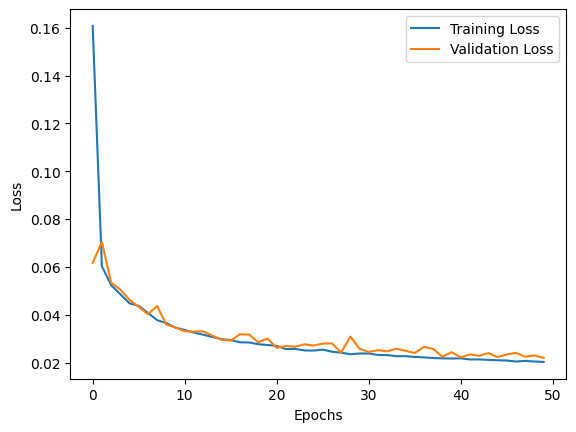

In [13]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# Future Forecasting
# Assuming we have a DataFrame 'future_data' with features for the next 2 years

# Feature Engineering for future dates
future_data['Month'] = pd.to_datetime(future_data['Date']).dt.month
future_data['Day'] = pd.to_datetime(future_data['Date']).dt.day
future_data = pd.get_dummies(future_data, columns=['type', 'region'])

# Standardize features for future data
future_data_scaled = scaler.transform(future_data.drop('Date', axis=1))

# Prediction for future dates
future_predictions = model.predict(future_data_scaled)

# Visualization
plt.plot(df['Date'], df['AveragePrice'], label='Actual Prices')
plt.plot(future_data['Date'], future_predictions, label='Predicted Prices for the Future')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

NameError: name 'future_data' is not defined

In [15]:
# need data to predict the future


In [16]:
import pandas as pd
import numpy as np

# Assuming 'model' is your trained neural network model
# Assuming 'scaler' is the scaler used for training data

# Simulate future dates for the next 2 years
future_dates = pd.date_range(start=df['Date'].max(), periods=104, freq='W')  # 52 weeks per year * 2 years = 104 weeks
future_data_simulated = pd.DataFrame({'Date': future_dates})

# Feature Engineering for future dates
future_data_simulated['Month'] = future_data_simulated['Date'].dt.month
future_data_simulated['Day'] = future_data_simulated['Date'].dt.day
# Add other necessary features and dummy encoding as needed

# Standardize features for simulated future data
future_data_simulated_scaled = scaler.transform(future_data_simulated.drop('Date', axis=1))

# Prediction for simulated future dates
future_predictions_simulated = model.predict(future_data_simulated_scaled)

# Add the simulated predicted prices to the future_data_simulated DataFrame
future_data_simulated['PredictedPrice'] = future_predictions_simulated

# Display the simulated predicted prices for the future dates
print(future_data_simulated[['Date', 'PredictedPrice']])


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- 4046
- 4225
- 4770
- Large Bags
- Small Bags
- ...
